In [1]:
!pip install tensorflow.keras

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("scolianni/mnistasjpg")

print("Path to dataset files:", path)

100%|██████████| 68.4M/68.4M [00:00<00:00, 176MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/scolianni/mnistasjpg/versions/1


In [14]:
dataset_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
dataset_test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [15]:
X_train = dataset_train.iloc[:,1:].to_numpy()
Y_train = dataset_train.iloc[:,0].to_numpy()
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (19999, 784)
Y_train shape: (19999,)


We have 19,999 examples and each are grayscale images of 28x28

Our label Y_train is a rank 1 array and we dont want that and we should also normalise the pixel values.
And to train a CNN we need our X_train to be a matrix.

In [27]:
X_train = X_train / 255.0
X_train = X_train.reshape(-1,28,28,1)
Y_train = Y_train.reshape(-1,1)
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (19999, 28, 28, 1)
Y_train shape: (19999, 1)


In [19]:
#now for our test set
X_test = dataset_test.iloc[:,1:].to_numpy()
Y_test = dataset_test.iloc[:,0].to_numpy()
X_test = X_test / 255.0
X_test = X_test.reshape(-1,28,28,1)
Y_test = Y_test.reshape(-1,1)
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_test shape: (9999, 28, 28, 1)
Y_test shape: (9999, 1)


Nice!

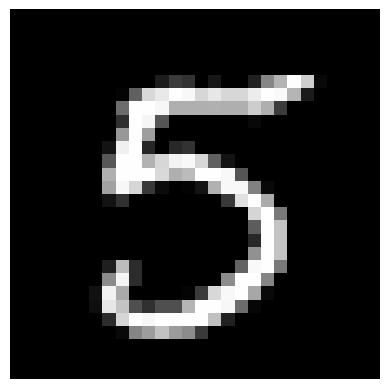

[5]


In [12]:
image = X_train[0].reshape(28,28) #No channels as its a grayscale image
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()
print(Y_train[0])

Theres our sample image with its corresponding labeled output


Now let's build a CNN using tensorflow

We will be using 3 layers for our model as its a simple project and i dont want to waste my compute units for this.
Some people might not count POOL layer as a "layer" but i'm gonna count cuz its simple for me that way.

Our model would be
Conv2D ---> Max POOL ----> FC ----> Softmax Output

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(filters=8, kernel_size=3, strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          15,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,770 (61.60 KB)

 Trainable params: 15,770 (61.60 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train, epochs=10,
                    validation_data=(X_test, Y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7489 - loss: 0.8820 - val_accuracy: 0.9243 - val_loss: 0.2605
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9236 - loss: 0.2570 - val_accuracy: 0.9401 - val_loss: 0.2063
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9460 - loss: 0.1883 - val_accuracy: 0.9523 - val_loss: 0.1612
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9551 - loss: 0.1549 - val_accuracy: 0.9560 - val_loss: 0.1482
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9611 - loss: 0.1278 - val_accuracy: 0.9574 - val_loss: 0.1363
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9702 - loss: 0.1109 - val_accuracy: 0.9633 - val_loss: 0.1231
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9717 - loss: 0.0996 - val_accuracy: 0.9639 - val_loss: 0.1185
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9760 - loss: 0.0847 - va

313/313 - 2s - 8ms/step - accuracy: 0.9678 - loss: 0.1062


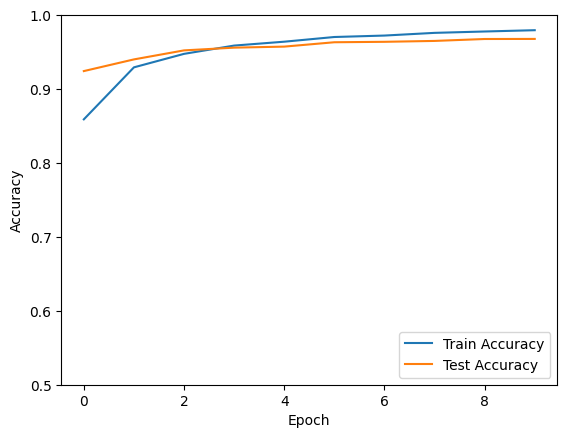

In [30]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

Our model is finally trained and we have an accuracy of 98% 🍾

Now let's take a random image and try it on our model

In [46]:
prediction_image = plt.imread("/content/8.jpg")
prediction_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   4,   0,   0,
          3,   5,   0,   0,   1,   0,   0,   4,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   4,   0,
          0,   0,   5,   4,   0,   0,   2,   0,   0,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,   0,   0,   4,   4,
          0,   0,   0,   3,   0,   0,   0,   0,   2,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   8,   0,   1,   0,   0,   3,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,   5,   0,   0,   6,
          9,   0,   0,   7,  10,   0,   0,   9,   3,   0,  10,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  32,
         98, 190, 255, 246, 233, 255, 219,  57,   0,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13,   0,  27, 132, 234,
        255, 255, 240, 249, 255, 243, 224, 252, 151,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 112, 236, 255,
        211, 135, 107,  11,   0,  86, 211, 255, 242, 143,  17,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  71, 231, 255, 182,
         21,   6,   0,   6,   0,   8,   0, 156, 255, 246,  52,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 255, 227,  52,
          0,   0,   0,   0,   0,   0,  30,  73, 249, 255,  44,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,  41, 253, 250,  47,
         12,   0,  10,  62,  11,   1,  56, 226, 255, 251,  38,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 145, 246,  48,
          0,   3,   0, 191, 223, 201, 255, 242, 255, 151,  11,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,   0,   3, 251, 255,
        107,  54, 179, 251, 255, 255, 246, 206,  83,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,   0,  32, 209, 230,
        255, 255, 252, 254, 242, 248, 157,  16,  11,  10,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 191, 255, 248,
        255, 249, 188, 108,  69,  10,   0,   0,   9,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 150, 253, 252, 246, 255,
        252, 240, 169,   0,  19,   0,   0,  18,   0,   0,   3,   0,   0,
          0,   0],
       [  6,   0,   0,   4,   0,   0,  26, 150, 255, 247, 153,  95,   0,
        135, 250, 241,  24,  12,   0,   1,  16,   0,  10,   8,   0,   0,
          0,   0],
       [  0,  18,   0,   0,  18,   6, 211, 254, 224, 129,   0,   0,   9,
         18, 224, 245, 182,   0,   5,   8,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   4,   0,   0,   0, 132, 255, 251,  77,   7,  17,   3,   0,
          0, 104, 253, 255,   4,   1,   4,   0,  18,   4,   1,   0,   0,
          0,   0],
       [  9,   0,  11,   0,  33, 203, 254,  95,   5,   0,   0,   0,   0,
          8, 106, 248, 251,  82,   8,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  7,   0,  13,   0,  36, 252, 245,  58,   0,   0,  19,   0,   9,
          0,  96, 255, 249, 121,   8,   0,  12,   0,   2,   1,   0,   0,
          0,   0],
       [  1,   0,   1,   4,   0, 217, 244, 175,   6,  22,   0,   0,   0,
          9, 134, 251, 255,  78,   3,   0,   5,   7,   8,   5,   0,   0,
          0,   0],
       [  0,  17,   0,   0,  10,  52, 250, 241, 172,  81,  15,   1,  36,
        195, 209, 255, 227,  32,   6,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   0,   6,   1,   0,   9, 154, 255, 248, 255, 250, 255, 254,
        228, 255, 236, 105,   0,   0,   7,   3,   0,   2,   9,   0,   0,
          0,   0],
       [  2,   3,   0,   1,   6,   0,  2

Now lets resize it into 28x28x1 and also normalise it

In [47]:
prediction_image = prediction_image / 255.0
prediction_image = prediction_image.reshape(1,28,28,1)

In [48]:
prediction = model.predict(prediction_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [50]:
print(np.argmax(prediction))

8


Yayyyy!